# Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

In [4]:
df=pd.read_csv('IMDB_Movies_Dataset.csv')  #importing the dataset
df.head()  #displaying the first 5 rows of the dataset


,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes


In [5]:
df.info() #info about the dataset
df.describe() #descriptive statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4989 non-null   int64  
 1   Title              4989 non-null   object 
 2   Average Rating     4989 non-null   float64
 3   Director           4989 non-null   object 
 4   Writer             4988 non-null   object 
 5   Metascore          3055 non-null   float64
 6   Cast               4982 non-null   object 
 7   Release Date       4989 non-null   object 
 8   Country of Origin  4986 non-null   object 
 9   Languages          4968 non-null   object 
 10  Budget             2651 non-null   object 
 11  Worldwide Gross    3895 non-null   object 
 12  Runtime            4989 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 506.8+ KB


,Unnamed: 0,Average Rating,Metascore
count,4989.000000,4989.000000,3055.000000
mean,248.951493,7.632892,74.684452
std,144.036753,0.365243,12.298911
min,0.000000,7.200000,25.000000
25%,124.000000,7.300000,67.000000
50%,249.000000,7.600000,76.000000
75%,374.000000,7.800000,84.000000
max,499.000000,9.300000,100.000000


In [6]:
df.describe() #descriptive statistics of the dataset
np.mean(df['Average Rating']) #mean of the average rating
np.median(df['Average Rating']) #median of the average rating
np.std(df['Average Rating']) #standard deviation of the average rating
df['Average Rating'].mode() #mode of the average rating
np.var(df['Average Rating']) #variance of the average rating
np.min(df['Average Rating']) #minimum of the average rating
np.max(df['Average Rating']) #maximum of the average rating
np.quantile(df['Average Rating'],0.25) #first quartile of the average rating
np.quantile(df['Average Rating'],0.75) #third quartile of the average rating

7.8

In [7]:
df.isnull().sum() #checking for missing values

Unnamed: 0              0
Title                   0
Average Rating          0
Director                0
Writer                  1
Metascore            1934
Cast                    7
Release Date            0
Country of Origin       3
Languages              21
Budget               2338
Worldwide Gross      1094
Runtime                 0
dtype: int64

In [8]:

df.drop(columns=['Unnamed: 0'],inplace=True) #dropping the column 'Unnamed: 0'
df.head(5)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes


In [9]:
df.head(5)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes


In [10]:
df.dropna(inplace=True) #dropping missing values
df.isnull().sum() #checking for missing values

Title                0
Average Rating       0
Director             0
Writer               0
Metascore            0
Cast                 0
Release Date         0
Country of Origin    0
Languages            0
Budget               0
Worldwide Gross      0
Runtime              0
dtype: int64

In [11]:
df['Metascore'].value_counts() #checking the frequency of each value in the Metascore column
df['Metascore'].replace('N/A',np.nan,inplace=True) #replacing 'N/A' with NaN
df['Metascore']=df['Metascore'].astype(float) #converting the Metascore column to float

/var/folders/2z/kf92m3b96t51tf0khtbqm3xh0000gn/T/ipykernel_39072/2611673387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Metascore'].replace('N/A',np.nan,inplace=True) #replacing 'N/A' with NaN


In [12]:
df.head() #displaying the first 5 rows of the dataset

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","July 18, 2008 (India)","United States, United Kingdom","English, Mandarin","$185,000,000 (estimated)","$1,009,053,678",2 hours 32 minutes
8,Schindler's List,9.0,Steven Spielberg,"Thomas Keneally, Steven Zaillian",95.0,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...","December 15, 1993 (India)",United States,"English, Hebrew, German, Polish, Latin","$22,000,000 (estimated)","$322,161,245",3 hours 15 minutes
9,12 Angry Men,9.0,Sidney Lumet,Reginald Rose,97.0,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","April 10, 1957 (United States)",United States,English,"$350,000 (estimated)","$2,945",1 hour 36 minutes


In [13]:
df.tail() #displaying the last 5 rows of the dataset

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
4954,Powaqqatsi,7.2,Godfrey Reggio,"Godfrey Reggio, Ken Richards",57.0,"Christie Brinkley, David Brinkley, Patrick Dis...","June 2, 1988 (West Germany)",United States,"Hopi, English, Spanish","$2,500,000 (estimated)","$592,592",1 hour 39 minutes
4957,Irina Palm,7.2,Sam Garbarski,"Philippe Blasband, Martin Herron",55.0,"Marianne Faithfull, Predrag 'Miki' Manojlovic,...","April 18, 2007 (Belgium)","Belgium, Germany, Luxembourg, United Kingdom, ...",English,"$4,500,000 (estimated)","$10,610,835",1 hour 43 minutes
4964,Chico & Rita,7.2,"Tono Errando, Javier Mariscal, Fernando Trueba","Ignacio Martínez de Pisón, Fernando Trueba",76.0,"Eman Xor Oña, Limara Meneses, Mario Guerra, Jo...","November 19, 2010 (United Kingdom)","Spain, United Kingdom, Isle of Man","Spanish, English, French","€9,200,000 (estimated)","$2,347,919",1 hour 34 minutes
4968,Silent Light,7.2,Carlos Reygadas,Carlos Reygadas,79.0,"Cornelio Wall, Miriam Toews, Maria Pankratz, P...","October 12, 2007 (Mexico)","Mexico, France, Netherlands, Germany","Low German, Spanish, French, English","€980,000 (estimated)","$877,577",2 hours 25 minutes
4976,The Bubble,7.2,Eytan Fox,"Gal Uchovsky, Eytan Fox, Martin Sherman",61.0,"Ohad Knoller, Yousef 'Joe' Sweid, Daniella Wir...","June 29, 2006 (Israel)",Israel,"Hebrew, Arabic, English","$1,500,000 (estimated)","$1,029,926",1 hour 57 minutes


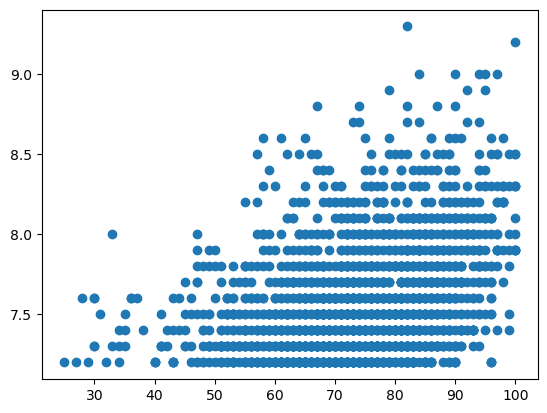

In [14]:
plt.scatter(df['Metascore'], df['Average Rating']) #scatter plot of Metascore and Rating

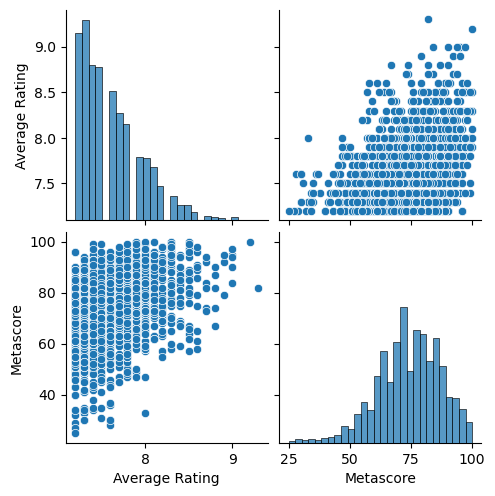

In [15]:
sns.pairplot(df) #pairplot of the dataset

In [16]:
df.info() #info about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 1926 entries, 0 to 4976
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1926 non-null   object 
 1   Average Rating     1926 non-null   float64
 2   Director           1926 non-null   object 
 3   Writer             1926 non-null   object 
 4   Metascore          1926 non-null   float64
 5   Cast               1926 non-null   object 
 6   Release Date       1926 non-null   object 
 7   Country of Origin  1926 non-null   object 
 8   Languages          1926 non-null   object 
 9   Budget             1926 non-null   object 
 10  Worldwide Gross    1926 non-null   object 
 11  Runtime            1926 non-null   object 
dtypes: float64(2), object(10)
memory usage: 195.6+ KB


In [17]:
df.head() #displaying the first 5 rows of the dataset

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","July 18, 2008 (India)","United States, United Kingdom","English, Mandarin","$185,000,000 (estimated)","$1,009,053,678",2 hours 32 minutes
8,Schindler's List,9.0,Steven Spielberg,"Thomas Keneally, Steven Zaillian",95.0,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...","December 15, 1993 (India)",United States,"English, Hebrew, German, Polish, Latin","$22,000,000 (estimated)","$322,161,245",3 hours 15 minutes
9,12 Angry Men,9.0,Sidney Lumet,Reginald Rose,97.0,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","April 10, 1957 (United States)",United States,English,"$350,000 (estimated)","$2,945",1 hour 36 minutes


<Axes: xlabel='Metascore', ylabel='Count'>

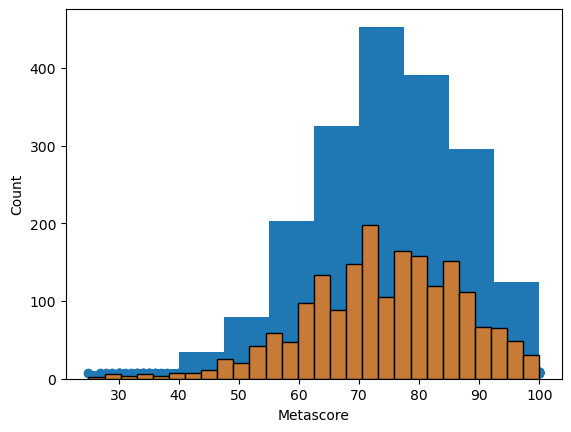

In [18]:
import matplotlib.pyplot as plt
df
plt.scatter(df['Metascore'], df['Average Rating']) #scatter plot of Metascore and Rating
plt.hist(df['Metascore']) #histogram of Metascore
sns.histplot(df['Metascore']) #histogram of Metascore

<Axes: xlabel='Average Rating', ylabel='Count'>

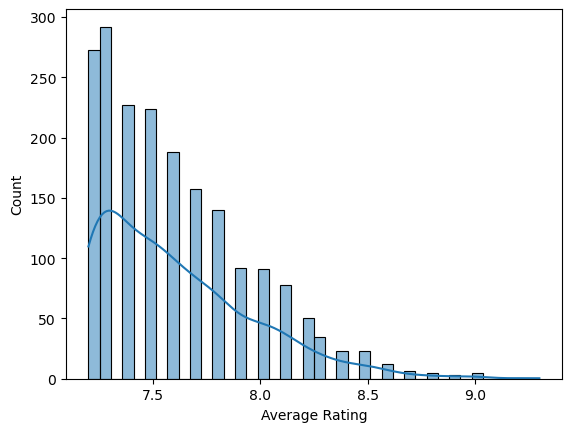

In [19]:
sns.histplot(df['Average Rating'],kde=True,bins=40) #histogram of Average Rating

In [28]:
df['Worldwide Gross'].str.replace('$','',regex=True).str.replace(',','',regex=True) #removing $ and , from the Worldwide column and converting it to float
df['Budget']=df['Budget'].str.replace('$','',regex=True).str.replace(',','',regex=True).str.replace(r'\s*\([^)]*\)\s*', '', regex=True) #removing $ and , from the Worldwide column and converting it to float
#df['Budget'].str.replace(r'\s*\([^)]*\)\s*', '', regex=True) #removing the brackets and the content inside them from the Budget column

In [30]:
df['Budget']=df['Budget'].str.replace('$','',regex=True).str.replace(',','',regex=True) #removing $ and , from the Budget column

In [43]:
df['Writer'].fillna(df['Writer'].mode()[0],inplace=True) #filling missing values in the Writer column with the mode